In [1]:
import json
import pandas as pd
import ast
import datetime
from tabulate import tabulate
from misc import display, convert_unixtime, convert_country_code, cut, copy_rename, get_slice, calculate_percentages
from misc import extract_relationship, extract_education, extract_group, agebuckets, expand, get_item

In [2]:
#infile = "collections/colombia/dataframe_collected_finished_1526497778.csv.gz" # From 16th May
#infile = "collections/colombia/dataframe_collected_finished_1526595686.csv.gz" # From 18th May
#infile = "collections/colombia/dataframe_collected_finished_1526754549.csv.gz" # From 19th May
#infile = "collections/colombia/dataframe_collected_finished_1527055300.csv.gz" # From 23th May   
#infile = "collections/colombia/dataframe_collected_finished_1527086071.csv.gz" # From 23th May
#infile = "collections/colombia/dataframe_collected_finished_1527152527.csv.gz" # From 24th May
#infile = "collections/colombia/dataframe_collected_finished_1527162372.csv.gz" # From 24th May
#infile = "collections/colombia/dataframe_collected_finished_1527262566.csv.gz" # From 25th May
#infile = "collections/colombia/dataframe_collected_finished_1527336923.csv.gz" # From 26th May
#infile = "collections/colombia/dataframe_collected_finished_1527421314.csv.gz" # From 27th May
#infile = "collections/colombia/dataframe_collected_finished_1527620434.csv.gz" # From 28th May
#infile = "collections/colombia/dataframe_collected_finished_1527655611.csv.gz" # From 29th May
#infile = "collections/colombia/dataframe_collected_finished_1527670079.csv.gz" # From 30th May
#infile = "collections/colombia/dataframe_collected_finished_1527714408.csv.gz" # From 31th May
#infile = "collections/colombia/dataframe_collected_finished_1527854965.csv.gz" # From 1st June
#infile = "collections/colombia/dataframe_collected_finished_1528052984.csv.gz" # From 3rd June
#infile = "collections/colombia/dataframe_collected_finished_1528190439.csv.gz" # From 5th June
#infile = "collections/colombia/dataframe_collected_finished_1528297332.csv.gz" # From 6th June
#infile = "collections/colombia/dataframe_collected_finished_1528410926.csv.gz" # From 8th June
#infile = "collections/colombia/dataframe_collected_finished_1528531672.csv.gz" # From 9th June
#infile = "collections/colombia/dataframe_collected_finished_1528635898.csv.gz" # From 10th June
#infile = "collections/colombia/dataframe_collected_finished_1528793179.csv.gz" # From 12th June
#infile = "collections/colombia/dataframe_collected_finished_1528925661.csv.gz" # From 14th June
#infile = "collections/colombia/dataframe_collected_finished_1529055941.csv.gz" # From 15th June
#infile = "collections/colombia/dataframe_collected_finished_1529181638.csv.gz" # From 16th June
#infile = "collections/colombia/dataframe_collected_finished_1529319680.csv.gz" # From 18th June
#infile = "collections/colombia/dataframe_collected_finished_1529483108.csv.gz" # From 20th June
#infile = "collections/colombia/dataframe_collected_finished_1529789939.csv.gz" # From 24th June
#infile = "collections/colombia/dataframe_collected_finished_1529923559.csv.gz" # From 25th June
#infile = "collections/colombia/dataframe_collected_finished_1530043687.csv.gz" # From 26th June
#infile = "collections/colombia/dataframe_collected_finished_1530166519.csv.gz" # From 28th June
#infile = "collections/colombia/dataframe_collected_finished_1530302641.csv.gz" # From 29th June
#infile = "collections/colombia/dataframe_collected_finished_1530458957.csv.gz" # From 1st July
#infile = "collections/colombia/dataframe_collected_finished_1530628267.csv.gz" # From 3rd July
#infile = "collections/colombia/dataframe_collected_finished_1530776924.csv.gz" # From 7th July
#infile = "collections/colombia/dataframe_collected_finished_1531052927.csv.gz" # From 8th July
#infile = "collections/colombia/dataframe_collected_finished_1531234195.csv.gz" # From 10th July
#infile = "collections/colombia/dataframe_collected_finished_1531409971.csv.gz" # From 12th July
#infile = "collections/colombia/dataframe_collected_finished_1531559817.csv.gz" # From 14th July
#infile = "collections/colombia/dataframe_collected_finished_1531736527.csv.gz" # From 16th July
#infile = "collections/colombia/dataframe_collected_finished_1531911069.csv.gz" # From 18th July
#infile = "collections/colombia/dataframe_collected_finished_1532085705.csv.gz" # From 20th July
#infile = "collections/colombia/dataframe_collected_finished_1532429163.csv.gz" # From 24th July
#infile = "collections/colombia/dataframe_collected_finished_1532783607.csv.gz" # From 28th July
#infile = "collections/colombia/dataframe_collected_finished_1533050685.csv.gz" # From 31th July
#infile = "collections/colombia/dataframe_collected_finished_1533290090.csv.gz" # From 3rd Aug
##infile = "collections/colombia/dataframe_collected_finished_1533560935.csv.gz" # From 6th Aug
#infile = "collections/colombia/dataframe_collected_finished_1533729781.csv.gz" # From 8th Aug
#infile = "collections/colombia/dataframe_collected_finished_1534438206.csv.gz" # From 16th Aug
#infile = "collections/colombia/dataframe_collected_finished_1535455177.csv.gz" # From 28th Aug
#infile = "collections/colombia/dataframe_collected_finished_1535613009.csv.gz" # From 30th Aug
#infile = "collections/colombia/dataframe_collected_finished_1535704009.csv.gz" # From 31th Aug
#infile = "collections/colombia/dataframe_collected_finished_1535966032.csv.gz" # From 3rd Sep
#infile = "collections/colombia/dataframe_collected_finished_1536177115.csv.gz" # From 5th Sep
#infile = "collections/colombia/dataframe_collected_finished_1536413370.csv.gz" # From 8th Sep
#infile = "collections/colombia/dataframe_collected_finished_1536596784.csv.gz" # From 10th Sep
#infile = "collections/colombia/dataframe_collected_finished_1536736442.csv.gz" # From 12th Sep
#infile = "collections/colombia/dataframe_collected_finished_1536826709.csv.gz" # From 13th Sep
#infile = "collections/colombia/dataframe_collected_finished_1537048958.csv.gz" # From 16th Sep
#infile = "collections/colombia/dataframe_collected_finished_1537189601.csv.gz" # From 17th Sep
#infile = "collections/colombia/dataframe_collected_finished_1537419482.csv.gz" # From 20th Sep
#infile = "collections/colombia/dataframe_collected_finished_1537598782.csv.gz" # From 22th Sep
#infile = "collections/colombia/dataframe_collected_finished_1537783326.csv.gz" # From 24th Sep
#infile = "collections/colombia/dataframe_collected_finished_1537919939.csv.gz" # From 26th Sep
#infile = "collections/colombia/dataframe_collected_finished_1538096500.csv.gz" # From 28th Sep
#infile = "collections/colombia/dataframe_collected_finished_1538322081.csv.gz" # From 30th Sep
#infile = "collections/colombia/dataframe_collected_finished_1538548161.csv.gz" # From 3rd Oct
#infile = "collections/colombia/dataframe_collected_finished_1538822176.csv.gz" # From 6th Oct
#infile = "collections/colombia/dataframe_collected_finished_1539021159.csv.gz" # From 8th Oct
#infile = "collections/colombia/dataframe_collected_finished_1539487962.csv.gz" # From 14th Oct
#infile = "collections/colombia/dataframe_collected_finished_1539690735.csv.gz" # From 16th Oct
#infile = "collections/colombia/dataframe_collected_finished_1540817728.csv.gz" # From 29th Oct
#infile = "collections/colombia/dataframe_collected_finished_1540897603.csv.gz" # From 30th Oct
#infile = "collections/colombia/dataframe_collected_finished_1541057904.csv.gz" # From 1st Nov
#infile = "collections/colombia/dataframe_collected_finished_1541081301.csv.gz" # From 1st Nov
#infile = "collections/colombia/dataframe_collected_finished_1541235208.csv.gz" # From 3rd Nov
#infile = "collections/colombia/dataframe_collected_finished_1541317062.csv.gz" # From 4th Nov
#infile = "collections/colombia/dataframe_collected_finished_1541416494.csv.gz" # From 5th Nov
#infile = "collections/colombia/dataframe_collected_finished_1541496075.csv.gz" # From 6th Nov
#infile = "collections/colombia/dataframe_collected_finished_1541680672.csv.gz" # From 8th Nov
#infile = "collections/colombia/dataframe_collected_finished_1541845203.csv.gz" # From 10th Nov
#infile = "collections/colombia/dataframe_collected_finished_1541933084.csv.gz" # From 11th Nov
#infile = "collections/colombia/dataframe_collected_finished_1542101956.csv.gz" # From 13th Nov
#infile = "collections/colombia/dataframe_collected_finished_1542225410.csv.gz" # From 14th Nov
infile = "collections/colombia/dataframe_collected_finished_1542561773.csv.gz" # From 14th Nov


In [3]:
df = pd.read_csv(infile)
day, month = df["timestamp"].apply(lambda x: convert_unixtime(x)).head(1).values[0].split("-")
print("Collection made on %s-%s" % (day, month))
#print ",\n".join(list(df["geo_locations"].unique())).replace("'", '"')

/home/palotti/p3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Collection made on 18-11


In [180]:
df[["MinAge","MaxAge","Location","LocationHierarchy","LocationType","Gender","Relationship","Education","Group"]] = df["targeting"].apply(lambda x : expand(ast.literal_eval(x))).apply(pd.Series)

if "citizenship" in df:
    df["Group"] = df["citizenship"].fillna("[]").apply(lambda x : get_item(ast.literal_eval(x)))
    print("Updating Group information...")
    
if "access_device" in df:
    df["Device"] = df["access_device"].fillna("[]").apply(lambda x : get_item(ast.literal_eval(x)))
    print("Adding information regarding devices...")
else:
    df["Device"] = None
    
df["AgeBucket"] = df[["MinAge","MaxAge"]].apply(lambda x: agebuckets(x["MinAge"], x["MaxAge"]), axis=1)

print("Removing redundant cols")
for col in ["Unnamed: 0", "all_fields", "targeting",'behavior', 'citizenship', "mock_response", "access_device", 
            "ages_ranges", "household_composition", 'interests', 'family_statuses', 'genders', 'geo_locations', 'languages',
            'name', 'relationship_statuses', 'response', 'scholarities', 'timestamp', 'publisher_platforms',]:
    if col in df.keys():
        del df[col]

# Gave up using travel_in   
df = df[df["LocationType"] != "travel_in"]

main_fields = ['demographics', 'MinAge', 'MaxAge', 'Location', 'LocationHierarchy', 'LocationType', 'Gender', 'Relationship', 'Education', 'Group', 'Device', 'AgeBucket']
df = df.drop_duplicates(subset=main_fields)

education_levels = ["graduated", "high_school", "no_degree"]
print("All Done!")
# Brief description: 
# -----------------
# Gender: 0 Both, 1 Man, 2 Woman
# Age: 13-Null, 13-18, 19-25, 26-40, 41-65, 65+
# LocationType: home_recent, home, recent


Updating Group information...
Adding information regarding devices...
Removing redundant cols
All Done!


In [181]:
dfgender = {}
dfcut = df[(df["Gender"].apply(lambda x : x in ["man","woman"])) & (df["Education"].isnull()) & (df["Device"].isnull()) & (df["AgeBucket"] == "all") & (df["Group"] == "Expats (Venezuela)") & (df["LocationType"] == "home_recent")].copy()
dfgender["mau"] = get_slice(dfcut, "Gender", ["man","woman"], frequency="mau")
dfgender["dau"] = get_slice(dfcut, "Gender", ["man","woman"], frequency="dau")
calculate_percentages(dfgender["mau"], ["man","woman"], "%ven_")
calculate_percentages(dfgender["dau"], ["man","woman"], "%ven_")

In [182]:
df_gender_locals = {}
dfcut = df[(df["Gender"].apply(lambda x : x in ["man","woman"])) & (df["Education"].isnull()) & (df["Device"].isnull()) 
           & (df["AgeBucket"] == "all") & (df["Group"].isnull()) & (df["LocationType"] == "home_recent") ].copy()

df_gender_locals["mau"] = get_slice(dfcut, "Gender", ["man","woman"], frequency="mau") 
df_gender_locals["dau"] = get_slice(dfcut, "Gender", ["man","woman"], frequency="dau")

calculate_percentages(df_gender_locals["mau"], ["man","woman"], "%locals_")
calculate_percentages(df_gender_locals["dau"], ["man","woman"], "%locals_")

for col in ["man","woman"]:
    del df_gender_locals["mau"]["audience_" + col]
    del df_gender_locals["dau"]["audience_" + col]


In [183]:
dfage = {}
dfcut = df[(df["Education"].isnull()) & (df["Device"].isnull()) &  (df["AgeBucket"].apply(lambda x : x in ["adolecent","young_adult","adult","middle_age", "elder"])) &
    (df["Group"] == "Expats (Venezuela)") & (df["Gender"] == "both") & (df["LocationType"] == "home_recent") ].copy()
dfage["mau"] = get_slice(dfcut, "AgeBucket", ["adolecent","young_adult","adult","middle_age", "elder"], frequency="mau") 
dfage["dau"] = get_slice(dfcut, "AgeBucket", ["adolecent","young_adult","adult","middle_age", "elder"], frequency="dau")

calculate_percentages(dfage["mau"], ["adolecent","young_adult","adult","middle_age", "elder"], "%ven_")
calculate_percentages(dfage["dau"], ["adolecent","young_adult","adult","middle_age", "elder"], "%ven_")


In [184]:
df_age_pyramid = {}
dfcut_man = df[(df["AgeBucket"].apply(lambda x : x in ["adolecent","young_adult","adult","middle_age", "elder"])) & (df["Gender"] == "man") &
           (df["Education"].isnull()) & (df["Device"].isnull()) &  (df["Group"] == "Expats (Venezuela)") & (df["LocationType"] == "home_recent") ]
df_age_pyramid["mau_man"] = get_slice(dfcut_man, "AgeBucket", ["adolecent","young_adult","adult","middle_age", "elder"], frequency="mau")
df_age_pyramid["dau_man"] = get_slice(dfcut_man, "AgeBucket", ["adolecent","young_adult","adult","middle_age", "elder"], frequency="dau")

dfcut_woman = df[(df["AgeBucket"].apply(lambda x : x in ["adolecent","young_adult","adult","middle_age", "elder"])) & (df["Gender"] == "woman") &
           (df["Education"].isnull()) & (df["Device"].isnull()) &  (df["Group"] == "Expats (Venezuela)") & (df["LocationType"] == "home_recent") ]
df_age_pyramid["mau_woman"] = get_slice(dfcut_woman, "AgeBucket", ["adolecent","young_adult","adult","middle_age", "elder"], frequency="mau")
df_age_pyramid["dau_woman"] = get_slice(dfcut_woman, "AgeBucket", ["adolecent","young_adult","adult","middle_age", "elder"], frequency="dau")

df_age_pyramid["dau"] = pd.merge(df_age_pyramid["dau_man"],df_age_pyramid["dau_woman"], on=["Location","Frequency"], suffixes=("_man","_woman"))
df_age_pyramid["mau"] = pd.merge(df_age_pyramid["mau_man"],df_age_pyramid["mau_woman"], on=["Location","Frequency"], suffixes=("_man","_woman"))


In [185]:
df_age_locals = {}
dfcut = df[(df["Education"].isnull()) & (df["Device"].isnull()) &  (df["AgeBucket"].apply(lambda x : x in ["adolecent","young_adult","adult","middle_age", "elder"])) &
    (df["Group"].isnull()) & (df["Gender"] == "both") & (df["LocationType"] == "home_recent") ].copy()
df_age_locals["mau"] = get_slice(dfcut, "AgeBucket", ["adolecent","young_adult","adult","middle_age", "elder"], frequency="mau") 
df_age_locals["dau"] = get_slice(dfcut, "AgeBucket", ["adolecent","young_adult","adult","middle_age", "elder"], frequency="dau")

calculate_percentages(df_age_locals["mau"], ["adolecent","young_adult","adult","middle_age", "elder"], "%locals_")
calculate_percentages(df_age_locals["dau"], ["adolecent","young_adult","adult","middle_age", "elder"], "%locals_")

for col in ["adolecent","young_adult","adult","middle_age", "elder"]:
    del df_age_locals["mau"]["audience_" + col]
    del df_age_locals["dau"]["audience_" + col]


In [186]:
# ToDO: it fails for the colection made with only home/recent
dfloctype = {}
dfcut = df[(df["LocationType"].apply(lambda x : x in ["home","recent","travel_in","home_recent"])) & (df["Education"].isnull()) & (df["Device"].isnull()) & (df["AgeBucket"] == "all") & 
           (df["Group"] == "Expats (Venezuela)") & (df["Gender"] == "both") ]
dfloctype["mau"] = get_slice(dfcut, "LocationType", ["home","recent"], frequency="mau")
dfloctype["dau"] = get_slice(dfcut, "LocationType", ["home","recent"], frequency="dau")

calculate_percentages(dfloctype["mau"], ["home","recent"], "%ven_")
calculate_percentages(dfloctype["dau"], ["home","recent"], "%ven_")

In [187]:
df_loctype_pyramid = {}
#dfcut_man = df[(~df["Education"].isnull()) & (df["Gender"] == "man") & (df["AgeBucket"] == "all") & (df["Device"].isnull()) &  (df["Group"] == "Expats (Venezuela)") & (df["LocationType"] == "home_recent") ]
dfcut_man = df[(df["LocationType"].apply(lambda x : x in ["home","recent"])) & (df["Device"].isnull()) & (df["Education"].isnull()) & (df["Gender"] == "man") & (df["AgeBucket"] == "all") &  (df["Group"] == "Expats (Venezuela)") ]
df_loctype_pyramid["mau_man"] = get_slice(dfcut_man, "LocationType", ["home","recent"], frequency="mau")
df_loctype_pyramid["dau_man"] = get_slice(dfcut_man, "LocationType", ["home","recent"], frequency="dau")

dfcut_woman = df[(df["LocationType"].apply(lambda x : x in ["home","recent"])) & (df["Device"].isnull()) & (df["Education"].isnull()) & (df["Gender"] == "woman") & (df["AgeBucket"] == "all") &  (df["Group"] == "Expats (Venezuela)") ]
df_loctype_pyramid["mau_woman"] = get_slice(dfcut_woman, "LocationType", ["home","recent"], frequency="mau")
df_loctype_pyramid["dau_woman"] = get_slice(dfcut_woman, "LocationType", ["home","recent"], frequency="dau")

df_loctype_pyramid["dau"] = pd.merge(df_loctype_pyramid["dau_man"],df_loctype_pyramid["dau_woman"], on=["Location","Frequency"], suffixes=("_man","_woman"))
df_loctype_pyramid["mau"] = pd.merge(df_loctype_pyramid["mau_man"],df_loctype_pyramid["mau_woman"], on=["Location","Frequency"], suffixes=("_man","_woman"))

In [188]:
df_loctype_locals = {}
dfcut = df[(df["LocationType"].apply(lambda x : x in ["home","recent"])) & (df["Education"].isnull()) & (df["Device"].isnull()) & (df["AgeBucket"] == "all") &
    (df["Group"].isnull()) & (df["Gender"] == "both") ].copy()
df_loctype_locals["mau"] = get_slice(dfcut, "LocationType", ["home","recent"], frequency="mau") 
df_loctype_locals["dau"] = get_slice(dfcut, "LocationType", ["home","recent"], frequency="dau")

calculate_percentages(df_loctype_locals["mau"], ["home","recent"], "%locals_")
calculate_percentages(df_loctype_locals["dau"], ["home","recent"], "%locals_")

for col in ["home","recent"]:
    del df_loctype_locals["mau"]["audience_" + col]
    del df_loctype_locals["dau"]["audience_" + col]


In [189]:
dfdevice = {}
dfcut = df[(df["Education"].isnull()) & (~df["Device"].isnull()) & (df["AgeBucket"] == "all") &  (df["Group"] == "Expats (Venezuela)") & (df["Gender"] == "both") & (df["LocationType"] == "home_recent") ]
dfdevice["mau"] = get_slice(dfcut, "Device", ["iOS","Android","Other"], frequency="mau")
dfdevice["dau"] = get_slice(dfcut, "Device", ["iOS","Android","Other"], frequency="dau")

calculate_percentages(dfdevice["mau"], ["iOS","Android","Other"], "%ven_")
calculate_percentages(dfdevice["dau"], ["iOS","Android","Other"], "%ven_")


In [190]:
df_device_pyramid = {}

dfcut_man = df[(~df["Device"].isnull()) & (df["Education"].isnull()) & (df["Gender"] == "man") & (df["AgeBucket"] == "all") & (df["Group"] == "Expats (Venezuela)") & (df["LocationType"] == "home_recent") ]
df_device_pyramid["mau_man"] = get_slice(dfcut_man, "Device", ["iOS","Android","Other"], frequency="mau")
df_device_pyramid["dau_man"] = get_slice(dfcut_man, "Device", ["iOS","Android","Other"], frequency="dau")

dfcut_woman = df[(~df["Device"].isnull()) & (df["Education"].isnull()) & (df["Gender"] == "woman") & (df["AgeBucket"] == "all") & (df["Group"] == "Expats (Venezuela)") & (df["LocationType"] == "home_recent") ]

df_device_pyramid["mau_woman"] = get_slice(dfcut_woman, "Device", ["iOS","Android","Other"], frequency="mau")
df_device_pyramid["dau_woman"] = get_slice(dfcut_woman, "Device", ["iOS","Android","Other"], frequency="dau")

df_device_pyramid["dau"] = pd.merge(df_device_pyramid["dau_man"],df_device_pyramid["dau_woman"], on=["Location","Frequency"], suffixes=("_man","_woman"))
df_device_pyramid["mau"] = pd.merge(df_device_pyramid["mau_man"],df_device_pyramid["mau_woman"], on=["Location","Frequency"], suffixes=("_man","_woman"))

In [191]:
df_device_locals = {}
dfcut = df[(~df["Device"].isnull()) & (df["Education"].isnull()) & (df["AgeBucket"] == "all") & (df["Group"].isnull()) & (df["Gender"] == "both") & (df["LocationType"] == "home_recent") ].copy()
df_device_locals["mau"] = get_slice(dfcut, "Device", ["iOS","Android","Other"], frequency="mau") 
df_device_locals["dau"] = get_slice(dfcut, "Device", ["iOS","Android","Other"], frequency="dau")

calculate_percentages(df_device_locals["mau"], ["iOS","Android","Other"], "%locals_")
calculate_percentages(df_device_locals["dau"], ["iOS","Android","Other"], "%locals_")

for col in ["iOS","Android","Other"]:
    del df_device_locals["mau"]["audience_" + col]
    del df_device_locals["dau"]["audience_" + col]


In [192]:
dfedu = {}
dfcut = df[(~df["Education"].isnull()) & (df["Device"].isnull()) & (df["AgeBucket"] == "all") &  (df["Group"] == "Expats (Venezuela)") & (df["Gender"] == "both") & (df["LocationType"] == "home_recent") ]
dfedu["mau"] = get_slice(dfcut, "Education", education_levels, frequency="mau")
dfedu["dau"] = get_slice(dfcut, "Education", education_levels, frequency="dau")

calculate_percentages(dfedu["mau"], education_levels, "%ven_")
calculate_percentages(dfedu["dau"], education_levels, "%ven_")


In [193]:
df_edu_pyramid = {}
dfcut_man = df[(~df["Education"].isnull()) & (df["Gender"] == "man") & (df["AgeBucket"] == "all") & (df["Device"].isnull()) &  (df["Group"] == "Expats (Venezuela)") & (df["LocationType"] == "home_recent") ]
df_edu_pyramid["mau_man"] = get_slice(dfcut_man, "Education", education_levels, frequency="mau")
df_edu_pyramid["dau_man"] = get_slice(dfcut_man,  "Education", education_levels, frequency="dau")

dfcut_woman = df[(~df["Education"].isnull()) & (df["Gender"] == "woman") & (df["AgeBucket"] == "all") & (df["Device"].isnull()) &  (df["Group"] == "Expats (Venezuela)") & (df["LocationType"] == "home_recent") ]
df_edu_pyramid["mau_woman"] = get_slice(dfcut_woman, "Education", education_levels, frequency="mau")
df_edu_pyramid["dau_woman"] = get_slice(dfcut_woman, "Education", education_levels, frequency="dau")

df_edu_pyramid["dau"] = pd.merge(df_edu_pyramid["dau_man"],df_edu_pyramid["dau_woman"], on=["Location","Frequency"], suffixes=("_man","_woman"))
df_edu_pyramid["mau"] = pd.merge(df_edu_pyramid["mau_man"],df_edu_pyramid["mau_woman"], on=["Location","Frequency"], suffixes=("_man","_woman"))


In [194]:
df_edu_locals = {}
dfcut = df[~(df["Education"].isnull()) & (df["Device"].isnull()) & (df["AgeBucket"] == "all") &
    (df["Group"].isnull()) & (df["Gender"] == "both") & (df["LocationType"] == "home_recent") ].copy()
df_edu_locals["mau"] = get_slice(dfcut, "Education", education_levels, frequency="mau") 
df_edu_locals["dau"] = get_slice(dfcut, "Education", education_levels, frequency="dau")

calculate_percentages(df_edu_locals["mau"], education_levels, "%locals_")
calculate_percentages(df_edu_locals["dau"], education_levels, "%locals_")

for col in education_levels:
    del df_edu_locals["mau"]["audience_" + col]
    del df_edu_locals["dau"]["audience_" + col]


In [195]:
for dfopt in [dfgender, dfage, dfedu, dfdevice, dfloctype, 
              df_age_pyramid, df_edu_pyramid, df_device_pyramid, df_loctype_pyramid,
              df_age_locals, df_edu_locals, df_device_locals,  df_loctype_locals]:
    dfopt["dau"] = dfopt["dau"].drop_duplicates()
    dfopt["mau"] = dfopt["mau"].drop_duplicates()

In [196]:
merged = {}

dfs_to_check = [dfloctype, df_loctype_locals, df_loctype_pyramid]

merged["mau"] = pd.merge(dfgender["mau"], dfage["mau"]).merge(df_gender_locals["mau"])     
merged["mau"] = merged["mau"].merge(df_age_locals["mau"]).merge(df_age_pyramid["mau"])
for d in dfs_to_check:
    if not d["mau"].empty:
        merged["mau"] = merged["mau"].merge(d["mau"])

merged["dau"] = pd.merge(dfgender["dau"], dfage["dau"]).merge(df_gender_locals["dau"])
merged["dau"] = merged["dau"].merge(df_age_locals["dau"]).merge(df_age_pyramid["dau"])
for d in dfs_to_check:
    if not d["dau"].empty:
        merged["dau"] = merged["dau"].merge(d["dau"])

if not dfdevice["mau"].empty:
    merged["mau"] = merged["mau"].merge(dfdevice["mau"]).merge(df_device_pyramid["mau"]).merge(df_device_locals["mau"])
    merged["dau"] = merged["dau"].merge(dfdevice["dau"]).merge(df_device_pyramid["dau"]).merge(df_device_locals["dau"])
    
if not dfedu["mau"].empty:
    merged["mau"] = merged["mau"].merge(dfedu["mau"]).merge(df_edu_pyramid["mau"]).merge(df_edu_locals["mau"])
    merged["dau"] = merged["dau"].merge(dfedu["dau"]).merge(df_edu_pyramid["dau"]).merge(df_edu_locals["dau"])
       
concated = pd.concat([merged["mau"], merged["dau"]])

venezuelans = df[(df["Education"].isnull()) & (df["Device"].isnull()) & (df["AgeBucket"] == "all") & (df["Group"] == "Expats (Venezuela)") & (df["Gender"] == "both") & (df["LocationType"] == "home_recent")]
allmigrants = df[(df["Education"].isnull()) & (df["Device"].isnull()) & (df["AgeBucket"] == "all") & (df["Group"] == "Ex-pats (All)") & (df["Gender"] == "both") & (df["LocationType"] == "home_recent")]
allpopulation = df[(df["Education"].isnull()) & (df["Device"].isnull()) & (df["AgeBucket"] == "all") & (df["Group"].isnull()) & (df["Gender"] == "both") & (df["LocationType"] == "home_recent")]

dffinal = pd.merge(venezuelans[["dau_audience","mau_audience","Location","LocationHierarchy"]], concated)
dffinal["venezuelans"] = dffinal["mau_audience"].where( dffinal["Frequency"]=="Monthly", dffinal["dau_audience"]) 
del dffinal["mau_audience"]
del dffinal["dau_audience"]

dffinal = pd.merge(allmigrants[["dau_audience","mau_audience","Location","LocationHierarchy"]], dffinal)
dffinal["allmigrants"] = dffinal["mau_audience"].where( dffinal["Frequency"]=="Monthly", dffinal["dau_audience"]) 
del dffinal["mau_audience"]
del dffinal["dau_audience"]

dffinal = pd.merge(allpopulation[["dau_audience","mau_audience","Location","LocationHierarchy"]], dffinal)
dffinal["allpopulation"] = dffinal["mau_audience"].where( dffinal["Frequency"]=="Monthly", dffinal["dau_audience"]) 
del dffinal["mau_audience"]
del dffinal["dau_audience"]

dffinal["ven/migrants"] = dffinal["venezuelans"] / dffinal["allmigrants"]
dffinal["ven/pop"] = dffinal["venezuelans"] / dffinal["allpopulation"]

dffinal["100ven/migrants"] = 100. * dffinal["ven/migrants"]
dffinal["100ven/pop"] = 100. * dffinal["ven/pop"]

for trans_col in ["ven/migrants", "ven/pop"]:
    dffinal[trans_col] = dffinal[trans_col].apply(lambda x: "%.4f" % x)
for trans_col in ["100ven/migrants", "100ven/pop"]:
    dffinal[trans_col] = dffinal[trans_col].apply(lambda x: "%.2f" % x)

dffinal["not_enough_data"] = False
dffinal.loc[dffinal["venezuelans"] <= 1000, "not_enough_data"] = True 

for col in ["home","recent"] + ["man","woman"] + ["adolecent","young_adult","adult","middle_age", "elder"] + ["graduated", "high_school", "no_degree"] +  ["iOS","Android","Other"]:
    if "%ven_audience_" + col in dffinal:
        dffinal["%diff_audience_" + col] = dffinal["%ven_audience_" + col] - dffinal["%locals_audience_" + col]


ramv = pd.read_csv("ramv.csv")[["Location","ramv_venezuelans"]]
dffinal = pd.merge(dffinal, ramv, on="Location", how="left")

dffinal["fb/ramv"] =  dffinal["venezuelans"] / dffinal["ramv_venezuelans"]

for col in dffinal.keys():
    if col.startswith("%"):
        print(col)
        dffinal[col] = dffinal[col].round(2)

for key in dffinal.keys():
    if key.startswith("audience_"):
        dffinal["display_"+key] = dffinal[key].apply(lambda x: display(x))
    
dffinal.to_csv("merged_%s_%s.csv" % (month, day), index=False)
print("Saved file merged_%s_%s.csv" % (month, day))

%ven_audience_man
%ven_audience_woman
%ven_audience_adolecent
%ven_audience_young_adult
%ven_audience_adult
%ven_audience_middle_age
%ven_audience_elder
%locals_audience_man
%locals_audience_woman
%locals_audience_adolecent
%locals_audience_young_adult
%locals_audience_adult
%locals_audience_middle_age
%locals_audience_elder
%ven_audience_iOS
%ven_audience_Android
%ven_audience_Other
%locals_audience_iOS
%locals_audience_Android
%locals_audience_Other
%ven_audience_graduated
%ven_audience_high_school
%ven_audience_no_degree
%locals_audience_graduated
%locals_audience_high_school
%locals_audience_no_degree
%diff_audience_man
%diff_audience_woman
%diff_audience_adolecent
%diff_audience_young_adult
%diff_audience_adult
%diff_audience_middle_age
%diff_audience_elder
%diff_audience_graduated
%diff_audience_high_school
%diff_audience_no_degree
%diff_audience_iOS
%diff_audience_Android
%diff_audience_Other
Saved file merged_11_18.csv


# CORRELATIONS

In [111]:
# Correlation with 20180926_Stocks_de_Poblacion_Venezoelana_en_la_region.pdf
pdf = [["Mexico",32500], ["Costa Rica",25000], ["Panama",76000], ["Colombia",935000], ["Ecuador",215000], ["Peru",414000], ["Bolivia",5000], ["Chile",105000],
       ["Argentina",95000], ["Uruguay",8500], ["Paraguay",500], ["Brazil",75000], ["Guyana",24000], ["Trinidad and Tobago",40000], ["Dominican Republic",26000],
       ["Latin America",2000000], ["World", 2600000]]

pdf = pd.DataFrame(pdf, columns=["Location","venezuelans"]).sort_values(by="venezuelans", ascending=False).reset_index(drop=True)
countries_pdf = set(pdf["Location"])

finalslice = dffinal[(dffinal["Location"].apply(lambda x: x in countries_pdf)) & (dffinal["Frequency"] == "Monthly")][["Location","venezuelans"]]

mergedpdf = pd.merge(pdf, finalslice, on="Location", suffixes=("_PDF", "_FB"))

print("Pearson: %.2f, Kendall: %.2f, Spearman: %.2f" % (mergedpdf.corr(method="pearson")["venezuelans_PDF"]["venezuelans_FB"], 
                                                        mergedpdf.corr(method="kendall")["venezuelans_PDF"]["venezuelans_FB"], 
                                                        mergedpdf.corr(method="spearman")["venezuelans_PDF"]["venezuelans_FB"]))

print("Estimates from Latin America. PDF: %d, FB: %d" % (mergedpdf.sum()["venezuelans_PDF"], mergedpdf.sum()["venezuelans_FB"]))
mergedpdf.sort_values(by="venezuelans_FB", ascending=False)

Pearson: 0.99, Kendall: 0.85, Spearman: 0.95
Estimates from Latin America. PDF: 2076500, FB: 2789600


,Location,venezuelans_PDF,venezuelans_FB
0,Colombia,935000,1300000.0
1,Peru,414000,520000.0
3,Chile,105000,260000.0
2,Ecuador,215000,220000.0
4,Argentina,95000,130000.0
8,Mexico,32500,100000.0
5,Panama,76000,81000.0
6,Brazil,75000,73000.0
9,Dominican Republic,26000,52000.0
10,Costa Rica,25000,16000.0


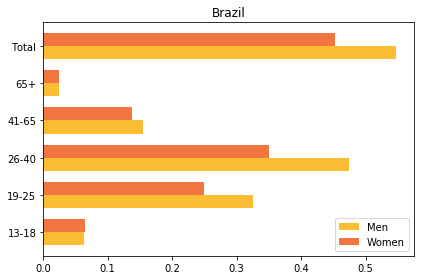

In [174]:
country = "Brazil"
location = dffinal[(dffinal["Location"] == country) & (dffinal["Frequency"] == "Monthly")]

n_groups = 6

total_man = location["audience_man"].values[0]
total_woman = location["audience_woman"].values[0]
means_men, means_women  = [], []

for group in ["adolecent", "young_adult", "adult", "middle_age", "elder"]:
    means_men.append( 1.0 * location["audience_" + group + "_man"].values[0] / total_man)
    means_women.append( 1.0 * location["audience_" + group + "_woman"].values[0] / total_man)
 

means_men.append(1.0 * location["audience_man"].values[0] / (total_man + total_woman))
means_women.append(1.0 * location["audience_woman"].values[0] / (total_man + total_woman))

import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(4,4))
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.99

rects1 = ax.barh(index, means_men, bar_width,
                alpha=opacity, color='#FBBC31',
                label='Men')

rects2 = ax.barh(index + bar_width, means_women, bar_width,
                alpha=opacity, color='#F2743C',
                label='Women')

ax.set_title(country)
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(('13-18', '19-25', '26-40', '41-65', '65+', 'Total'))
ax.legend()

fig.tight_layout()
plt.show()


In [ ]:
# Extra....Ingore this cell

dfcut = dffinal[(dffinal["Frequency"] == "Monthly") & (dffinal["venezuelans"] > 1000)]
#print("Pearson: %.2f, Spearman: %.2f, Kendall: %.2f" % (dffinal.corr("pearson")["ramv_venezuelans"]["venezuelans"], dffinal.corr("spearman")["ramv_venezuelans"]["venezuelans"], dffinal.corr("kendall")["ramv_venezuelans"]["venezuelans"]))

dfcut["FB_venezuelans"] = dfcut["venezuelans"] 
del dfcut["venezuelans"] 
dfcut = dfcut[["Location", "FB_venezuelans", "ramv_venezuelans", "fb/ramv"]]

dfcut = dfcut.sort_values("FB_venezuelans", ascending=False)
dfcut.dropna(subset=["ramv_venezuelans"], inplace=True)
dfcut.reset_index(inplace=True, drop=True)

print(tabulate(dfcut, headers='keys', tablefmt='psql'))